<a href="https://colab.research.google.com/github/Hamifthi/fast_ai_pratices/blob/master/cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
!pip install kaggle
!rm -r sample_data
!mkdir .kaggle

rm: cannot remove 'sample_data': No such file or directory


In [0]:
import json
token = {"username":"hamiai","key":"5b08bc78a0da0576451c203c1c42f91a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [7]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [8]:
!kaggle competitions download -c histopathologic-cancer-detection -p /content/

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 88.0MB/s]
 98% 5.00M/5.10M [00:00<00:00, 40.7MB/s]
100% 5.10M/5.10M [00:00<00:00, 32.6MB/s]
 99% 1.29G/1.30G [00:11<00:00, 108MB/s]
100% 1.30G/1.30G [00:11<00:00, 121MB/s]
100% 4.97G/4.98G [00:35<00:00, 143MB/s]
100% 4.98G/4.98G [00:35<00:00, 150MB/s]


In [9]:
!unzip -qq /content/test.zip -d /content/data/test
!rm /content/test.zip
!unzip -qq /content/train.zip -d /content/data/train
!rm /content/train.zip
!unzip -qq /content/train_labels.csv.zip -d /content/data
!rm /content/train_labels.csv.zip
!ls

data  gdrive  models  sample_submission.csv.zip


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = './data'
path_to_train_images = './data/train'

In [0]:
!mv data/train_labels.csv data/train/labels.csv

In [0]:
np.random.seed(44)
data = ImageDataBunch.from_csv(path_to_train_images, suffix='.tif', size = 229, bs = 64)

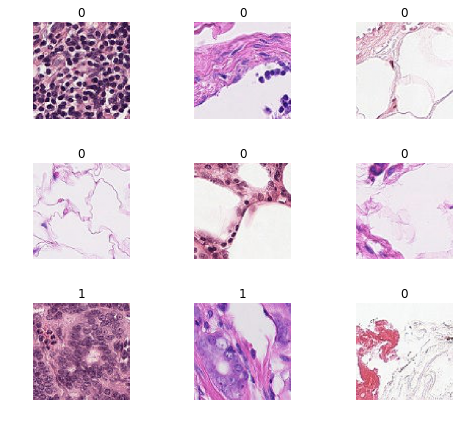

In [14]:
data.show_batch(rows = 3, figsize=(7, 6))

In [0]:
data.normalize()

In [0]:
model = create_cnn(data, models.resnet50, metrics = accuracy)
model.fit_one_cycle(7)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 140409152.70it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.222052,0.173353,0.933689,26:36
1,0.156849,0.124755,0.953573,26:32
2,0.127344,0.104648,0.962891,26:27
3,0.116785,0.100822,0.964595,26:32
4,0.089244,0.090311,0.968754,26:32


Buffered data was truncated after reaching the output size limit.

In [0]:
model.save(root_dir + 'resnet50_first_big_run')

In [0]:
model = create_cnn(data, models.resnet50, metrics = accuracy)
model.load(root_dir + 'resnet50_first_big_run')

In [19]:
model.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.095841,0.100872,0.966686,29:16
1,0.087572,0.086038,0.970412,29:22
2,0.069285,0.086032,0.972049,29:22


In [0]:
model.save(root_dir + 'resnet50_first_big_run_2')